# 🏀 Project Introduction: Optimizing Illinois Men’s Basketball Through Analytics

This project aims to provide actionable insights to the Illinois Men's Basketball coaching staff by leveraging publicly available data and advanced analytics. Specifically, it addresses two key challenges.

1. **Identifying the most effective 5-man lineups** based on advanced statistical profiles.
2. **Determining the team's MVP** using a customized weighted scoring model inspired by leading analytics frameworks like BartTorvik and EvanMiya.

To accomplish this, I collected and processed player and team data from BartTorvik, and developed:
- A lineup analysis tool that generates and scores all possible 5-man combinations based on offensive and defensive metrics.
- An MVP model that integrates box-score efficiency, playmaking shooting, defensive disruption, and on/off-court impact to rank player contributions.

The results offer **data-driven recommendations** for rotation optimization, game planning, and lineup deployment based on opponent type. Coaches and staff can use this tool to maximize lineup efficiency, strategically prepare for specific opponents, and amplify the contributions of high-impact players.

## 📊 Phase 1: Lineup Optimization & MVP Analysis

The first phase of this project focuses on analyzing Illinois Men's Basketball **individual player performance** and **5-man lineup combinations** to uncover the most statistically effective units on the court.
Using season data from BartTorvik, I constructed a comprehensive datasest of advanced player statistics, including offensive/defensive ratings, box score contributions, usage, shooting efficiency, and impact metrics such as BPM and PRPG. 
With this foundation, I:
- Calculated **all possible 5-man lineups** from the Illinois roster.
- Developed a **weighted scoring system to rank these lineups based on their projected offensive/defensive balance, playmaking, and efficiency.
- Created a **custom MVP model** that combines box-score performance with adjusted on/off-court impact metrics(BPM, ORTG, shooting splits, TO, USG%, PRPG, and team efficiency margins) to objectively identify the most valuable player on the team.

This phase delivers a ranked list of top-performance lineups and an evidence-based evaluation of individual player value, helping the coaching staff make informed decisions about **rotation patterns, clutch lineups, and player development focus areas**.

### 🔹 Step 1: Load Illinois Player Statistics

We begin by importing the `pandas` library and loading the player statistics dataset using `read_csv()`.

In [1]:
import pandas as pd

df = pd.read_csv('illinois_player_stat.csv')

To ensure the data has been loaded correctly, we use the `.head()` function to display the first five rows of the DataFrame. 

In [2]:
df.head()

,Player,MINper,PRPG,BPM,ORTG,USG,EFG,TS,OR,DR,...,CLOSE2_attemp,CLOSE2,FAR2_attemp,FAR2,FT_attemp,FT,2P_attemp,2P,3P_attemp,3P
0,Kasparas Jakucionis,74.5,3.8,5.4,109.3,25.6,51.9,59.0,4.9,13.6,...,113,76,56,19,168,142,169,95,170,54
1,Tomislav Ivisic,60.9,3.8,9.5,120.8,21.4,57.9,59.7,7.4,22.2,...,67,56,96,45,64,48,163,101,154,55
2,Will Riley,63.8,3.3,5.2,115.3,23.0,49.7,53.3,5.2,11.5,...,103,67,112,41,116,84,215,108,144,47
3,Kylan Boswell,76.9,3.2,4.8,111.3,20.9,48.0,54.0,4.7,11.4,...,148,94,39,12,143,113,187,106,143,35
4,Tre White,53.0,3.1,6.2,123.5,18.6,55.8,61.3,6.9,17.4,...,108,72,47,19,102,84,155,91,70,23


From the preview above, we can see that each row represents an individual Illinois player, and each column includes performance metrics relevant to offensive efficiency, playmaking, usage, and shooting ability. 

Key columns used in later analysis include:
- **BPM (Box Plus/Minus)**: An advanced stat that estimates a player's overall impact per 100 possessions.
- **ORTG (Offensive Rating)**: Points produced per 100 possessions - a direct measure of scoring efficiency.
- **USG (Usage Rate)**: The percentage of team possessions player uses while on the floor.
- **EFG / TS**: Measures of shooting efficiency - EFG accounts for 3-point shots, while TS includes free throws.
- **2P%, 3P%, FT%**: Used later to evaluate finishing, spacing, and late-game reliability.
- **STL, BLK, AST, TO**: Indicators of defensive activity and playmaking efficiency.

This data will be normalized and used to compute both:
- A **custom MVP Score** for ranking player impact, and
- **Scoring metrics for all possible 5-man lineups**.

The next step is to clean and prepare the data for scoring and visualization.

In [3]:
df = df[df['MINper'] > 5] 

This line filters out players who played fewer than **5 minutes per game** during the season. By doing this, we ensure that our analysis only includes players with a meaningful sample size, those who had a consistent role in the rotation.
This also prevents statistical outliers or players with extremely limited playing time from skewing the results in MVP scoring and lineup optimization.

This command sorts the dataset by **Offensive Rating (ORTG)** in descending order and displays the **top 5 players**. 
ORTG measures how many points a player produces per 100 possessions - a higher value indicates greater offensive efficiency.

This step helps identify the most efficient scores on the team and gives an early sense of which players are likely to score highly in the custom MVP model.

In [4]:
df.sort_values("ORTG", ascending = False).head(5)

,Player,MINper,PRPG,BPM,ORTG,USG,EFG,TS,OR,DR,...,CLOSE2_attemp,CLOSE2,FAR2_attemp,FAR2,FT_attemp,FT,2P_attemp,2P,3P_attemp,3P
5,Morez Johnson Jr.,37.5,2.5,6.7,127.3,17.8,64.2,64.4,17.3,22.5,...,106,70,14,7,89,55,120,77,0,0
4,Tre White,53.0,3.1,6.2,123.5,18.6,55.8,61.3,6.9,17.4,...,108,72,47,19,102,84,155,91,70,23
1,Tomislav Ivisic,60.9,3.8,9.5,120.8,21.4,57.9,59.7,7.4,22.2,...,67,56,96,45,64,48,163,101,154,55
6,Ben Humrichous,64.2,2.2,5.0,118.3,13.1,50.4,51.9,5.0,10.3,...,18,11,41,17,34,24,59,28,181,62
8,Jake Davis,21.4,0.8,2.2,118.1,13.9,54.1,54.1,6.3,9.3,...,20,13,1,0,6,3,21,13,64,22


### 🔍 Interpretation:
- **Morez Johnson Jr.** leads the team in ORTG (127.3), indicating elite efficiency on low usage - likely due to smart shot selection and finishing near the basket.
- **Tomizlav Ivisc** combines high usage (21.4%) with excellent ORTG (120.8) and the team's highest BPM (9.5), suggesting he's a high-volume, high-impact contributor.
- Players like **Ben Humrichous** and **Jake Davis** also show strong efficiency, but with lower usage, are valuable role players in specific lineups.

This data helps guide MVP scoring and lineup construction by identifying the most efficient offensive contributions. 

Show players with the highest BPM (Box Plus-Minus)

**BPM is an all-in-one advanced stat that estimates a player's total impact (offense + defense) per 100 possessions compared to an average player. A high BPM means the player is making a greater positive difference on the court. 

In [5]:
df.sort_values('BPM', ascending = False).head()

,Player,MINper,PRPG,BPM,ORTG,USG,EFG,TS,OR,DR,...,CLOSE2_attemp,CLOSE2,FAR2_attemp,FAR2,FT_attemp,FT,2P_attemp,2P,3P_attemp,3P
1,Tomislav Ivisic,60.9,3.8,9.5,120.8,21.4,57.9,59.7,7.4,22.2,...,67,56,96,45,64,48,163,101,154,55
5,Morez Johnson Jr.,37.5,2.5,6.7,127.3,17.8,64.2,64.4,17.3,22.5,...,106,70,14,7,89,55,120,77,0,0
4,Tre White,53.0,3.1,6.2,123.5,18.6,55.8,61.3,6.9,17.4,...,108,72,47,19,102,84,155,91,70,23
0,Kasparas Jakucionis,74.5,3.8,5.4,109.3,25.6,51.9,59.0,4.9,13.6,...,113,76,56,19,168,142,169,95,170,54
2,Will Riley,63.8,3.3,5.2,115.3,23.0,49.7,53.3,5.2,11.5,...,103,67,112,41,116,84,215,108,144,47


These players not only contribute to scoring but also with playmaking, defense, and efficiency, making them high-impact candidates in MVP analysis and key rotation decisions. 

In [6]:
df['Player'] = df['Player'].apply(lambda x: ', '.join(name.split()[0] for name in x.split(', ')))

The reason for this step is to make the **5-man lineup outputs easier to read and interpret**.
By using only **first names**, we avoid long or cluttered strings when displaying lineup combinations. 

This simplification improves the **clarity of visualizations, MVP tables**, and especially **lineup labels** used later in the project. 

In [7]:
import numpy as np

In [8]:
df['DUNK%'] = np.where(df['DUNK_attemp'] == 0, 0, df['DUNK'] / df['DUNK_attemp'])
df['CLOSE2%'] = np.where(df['CLOSE2_attemp'] == 0, 0, df['CLOSE2'] / df['CLOSE2_attemp'])
df['FAR2%'] = np.where(df['FAR2_attemp'] == 0, 0, df['FAR2'] / df['FAR2_attemp'])
df["3P%"] = np.where(df["3P_attemp"] == 0, 0, df["3P"] / df["3P_attemp"])
df["2P%"] = np.where(df["2P_attemp"] == 0, 0, df["2P"] / df["2P_attemp"])
df["FT%"] = np.where(df["FT_attemp"] == 0, 0, df["FT"] / df["FT_attemp"])

In this step, we calculate **shooting accuracy percentages** for various shot types:
- **DUNK%**: Dunks made / Dunks attempted
- **CLOSE2%**: Close 2-point field goals made / attempted
- **FAR2%**: Long 2-point field goals made / attempted
- **3P%, 2P%, FT%**: Standard shooting percentages

To avoid division errors, players with **zero attempts** in any category are assigned a shooting percentage of **0**.

These calculated percentages allow us to evaluate each player's **efficiency by shot type**, which will later be used in the **MVP scoring formula** and **lineup efficiency analysis**.

In [9]:
core_columns = ['Player', 'ORTG', 'USG', 'PRPG', 'BPM', 'DUNK%','CLOSE2%','FAR2%', '3P%', '2P%', 'FT%', 'AST', 'TO', 'STL', 'BLK']

filtered_df = df[core_columns].dropna()
filtered_df

,Player,ORTG,USG,PRPG,BPM,DUNK%,CLOSE2%,FAR2%,3P%,2P%,FT%,AST,TO,STL,BLK
0,Kasparas,109.3,25.6,3.8,5.4,1.000000,0.672566,0.339286,0.317647,0.562130,0.845238,26.0,25.4,1.5,0.8
1,Tomislav,120.8,21.4,3.8,9.5,1.000000,0.835821,0.468750,0.357143,0.619632,0.750000,15.8,15.4,1.2,4.0
2,Will,115.3,23.0,3.3,5.2,1.000000,0.650485,0.366071,0.326389,0.502326,0.724138,16.0,11.3,0.6,1.0
3,Kylan,111.3,20.9,3.2,4.8,1.000000,0.635135,0.307692,0.244755,0.566845,0.790210,18.8,18.1,2.0,0.7
4,Tre,123.5,18.6,3.1,6.2,1.000000,0.666667,0.404255,0.328571,0.587097,0.823529,6.0,12.8,1.0,1.4
5,Morez,127.3,17.8,2.5,6.7,0.931034,0.660377,0.500000,0.000000,0.641667,0.617978,2.7,13.6,1.3,5.5
6,Ben,118.3,13.1,2.2,5.0,0.800000,0.611111,0.414634,0.342541,0.474576,0.705882,5.6,8.0,1.0,2.2
7,Dra,112.0,18.1,1.4,1.3,1.000000,0.808511,0.482759,0.255102,0.684211,0.805556,5.8,13.6,1.2,0.3
8,Jake,118.1,13.9,0.8,2.2,0.000000,0.650000,0.000000,0.343750,0.619048,0.500000,5.5,10.6,0.2,1.5
11,Carey,76.5,15.9,-0.2,-4.6,0.000000,0.000000,0.428571,0.240000,0.375000,0.500000,1.5,19.4,0.0,3.3


In this step, we: 
1. Define a list of **core statistical features** that will be used to calculate the custom **MVP Score**.
2. Extract only those columns from the dataset.
3. Use `.dropna()` to remove any players who are missing key data, ensuring a clean dataset for analysis.

These features include: 
- **Offensive efficiency**: `ORTG`, `3P%`, `2P%`, `FT%`, `DUNK%`, `CLOSE2%`, `FAR2%`
- **Box score impact**: `BPM`, `PRPG`, `AST`, `TO`, `STL`, `BLK`
- **Usage & involvement**: `USG`

This filtered dataframe will be normalized and used as the input for MVP scoring in the next steps. 

In [10]:
from itertools import combinations

### 🏗️ Lineup Construction & Performance Analysis

In this section, we aim to **identify the most effective 5-man lineups** for Illinois Men's Basketball based on a combination of offensive and defensive stats.

To do this, we will:
- Generate **every possible 5-player combination** from the active roster.
- Calculate the **average value** of key performance metrics for each lineup, including
    - Offensive Rating (ORTG)
    - Box Plus/Minus (BPM)
    - Usage Rate (USG)
    - Shooting Efficiency (2P, 3P, FT, DUNK, etc)
    - Playmaking (AST, TO)
    - Defensive Disruption (STL, BLK)
- Rank the lineups by `Avg_ORTG` to highlight the most efficient scoring units.

This analysis helps the coaching staff make **data-driven decisions** on optimal lineup configurations for maximizing offensive output and overall team balance. 

Now, let's generate all valid 5-man combinations and compute their performance averages. 

In [11]:
# Clean column names: replace % and other special characters with underscores
filtered_df = filtered_df.rename(columns={
    'DUNK%': 'DUNK',
    'CLOSE2%': 'CLOSE2',
    'FAR2%': 'FAR2',
    '3P%': 'P3',
    '2P%': 'P2',
    'FT%': 'FT'
})

# Now define stat fields using renamed column names
stat_fields = [
    'ORTG', 'BPM', 'USG', 'DUNK', 'CLOSE2', 'FAR2', 'P3', 'P2', 'FT',
    'AST', 'TO', 'STL', 'BLK'
]

lineup_results = []

# Generate lineups and calculate average stats
for combo in combinations(filtered_df.itertuples(index=False, name='PlayerStats'), 5):
    players = [p.Player for p in combo]
    stats = {f'Avg_{stat}': np.mean([getattr(p, stat) for p in combo]) for stat in stat_fields}
    stats['Lineup'] = ', '.join(players)
    lineup_results.append(stats)

# Create DataFrame and sort
lineup_df = pd.DataFrame(lineup_results)
top_lineups = lineup_df.sort_values(by='Avg_ORTG', ascending=False).head(10)

top_lineups

,Avg_ORTG,Avg_BPM,Avg_USG,Avg_DUNK,Avg_CLOSE2,Avg_FAR2,Avg_P3,Avg_P2,Avg_FT,Avg_AST,Avg_TO,Avg_STL,Avg_BLK,Lineup
182,121.60,5.92,16.96,0.746207,0.684795,0.357528,0.274401,0.588404,0.679478,7.12,12.08,0.94,2.92,"Tomislav, Tre, Morez, Ben, Jake"
141,121.04,6.52,18.78,0.946207,0.684892,0.430742,0.270929,0.565059,0.724305,9.22,12.22,1.02,2.82,"Tomislav, Will, Tre, Morez, Ben"
143,121.00,5.96,18.94,0.786207,0.692670,0.347815,0.271171,0.593954,0.683129,9.20,12.74,0.86,2.68,"Tomislav, Will, Tre, Morez, Jake"
217,120.50,5.06,17.28,0.746207,0.647728,0.336992,0.268250,0.564943,0.674305,7.16,11.26,0.82,2.32,"Will, Tre, Morez, Ben, Jake"
181,120.38,5.74,17.80,0.946207,0.716497,0.454080,0.256672,0.601436,0.740589,7.18,12.68,1.14,2.68,"Tomislav, Tre, Morez, Ben, Dra"
184,120.34,5.18,17.96,0.786207,0.724275,0.371153,0.256913,0.630331,0.699412,7.16,13.20,0.98,2.54,"Tomislav, Tre, Morez, Dra, Jake"
161,120.24,6.44,18.36,0.946207,0.681822,0.419066,0.254602,0.577963,0.737520,9.78,13.58,1.30,2.76,"Tomislav, Kylan, Tre, Morez, Ben"
163,120.20,5.88,18.52,0.786207,0.689600,0.336140,0.254844,0.606858,0.696343,9.76,14.10,1.14,2.62,"Tomislav, Kylan, Tre, Morez, Jake"
152,119.96,5.72,17.84,0.746207,0.681559,0.349891,0.273965,0.571450,0.659600,9.12,11.78,0.86,2.84,"Tomislav, Will, Morez, Ben, Jake"
36,119.84,6.56,19.30,0.946207,0.689308,0.425385,0.269181,0.577020,0.748525,11.22,15.04,1.20,2.78,"Kasparas, Tomislav, Tre, Morez, Ben"


## 🏀 Lineup Metric Definitions

This analysis uses eight key performance indicators, grouped by offensive, defensive, and overall impact, to evaluate the effectiveness of 5-man lineups.

---

### 🔥 Offensive Metrics

| Metric       | Description                                                                 |
|--------------|-----------------------------------------------------------------------------|
| **Avg_ORTG** | *Offensive Rating*: Points per 100 possessions. A **higher** value means the lineup is more efficient at scoring. |
| **Avg_USG**  | *Usage Rate (%)*: Share of team possessions used by the player when on the court. Helps assess whether a lineup is balanced or overly reliant on certain players. |
| **Avg_3P%**  | *Three-Point Percentage*: Measures the lineup’s average ability to score from beyond the arc. Important for spacing and modern offensive strategy. |
| **Avg_AST**  | *Assists*: Reflects playmaking and ball movement. High values typically indicate unselfish, team-oriented lineups. |
| **Avg_TO**   | *Turnovers*: Represents ball security. **Lower** values are preferred, indicating fewer wasted possessions. |

---

### 🛡️ Defensive Metrics

| Metric       | Description                                                                 |
|--------------|-----------------------------------------------------------------------------|
| **Avg_STL**  | *Steals*: Measures defensive disruption and ability to force turnovers. **Higher** values can lead to transition scoring opportunities. |
| **Avg_BLK**  | *Blocks*: Indicates interior defense and rim protection. Valuable against teams that attack the paint. |

---

### 🌟 Overall Impact Metric

| Metric       | Description                                                                 |
|--------------|-----------------------------------------------------------------------------|
| **Avg_BPM**  | *Box Plus-Minus*: A catch-all stat estimating a player's contribution (offensive + defensive) per 100 possessions. **High** BPM values suggest well-rounded effectiveness. |

---

### ✅ Why We Use These Metrics

Together, these metrics provide a holistic evaluation of a lineup’s ability to:
- Score efficiently and share the ball (Offense)
- Defend the rim and disrupt the opponent (Defense)
- Maximize total value and synergy on the court (Overall)

This enables smart lineup recommendations that go beyond traditional box score stats.



In [12]:
from sklearn.preprocessing import MinMaxScaler

# Ensure no missing values and select scoring metrics
metrics = ["Avg_ORTG", "Avg_BPM", "Avg_USG", "Avg_P3", "Avg_AST", "Avg_TO", "Avg_STL", "Avg_BLK"]

lineup_df.dropna(subset = metrics, inplace = True)

scaler = MinMaxScaler()
normalized = scaler.fit_transform(lineup_df[metrics])
normalized_df = pd.DataFrame(normalized, columns = metrics)

# Assign weights to categories

weights = {
    'Avg_ORTG': 0.20, 
    'Avg_P3': 0.15,     
    'Avg_AST': 0.15, 
    'Avg_TO': -0.10,
    'Avg_USG': -0.05,
    'Avg_STL': 0.10,
    'Avg_BLK': 0.10,
    'Avg_BPM': 0.25
}

# Compute weighted score
normalized_df['Overall_Score'] = sum(normalized_df[col] * weight for col, weight in weights.items())

# Attach lineup names
normalized_df['Lineup'] = lineup_df['Lineup']

# Sort by Overall score
sorted_lineups = normalized_df.sort_values(by = 'Overall_Score', ascending = False).head(10)
sorted_lineups

,Avg_ORTG,Avg_BPM,Avg_USG,Avg_P3,Avg_AST,Avg_TO,Avg_STL,Avg_BLK,Overall_Score,Lineup
141,0.966507,0.983539,0.491857,0.463637,0.406504,0.134831,0.522727,0.804878,0.664392,"Tomislav, Will, Tre, Morez, Ben"
127,0.775120,0.905350,0.592834,0.845536,0.668293,0.261236,0.681818,0.414634,0.662316,"Tomislav, Will, Kylan, Tre, Ben"
7,0.751196,0.930041,0.745928,0.959271,0.785366,0.466292,0.568182,0.422764,0.659614,"Kasparas, Tomislav, Will, Tre, Ben"
161,0.918660,0.967078,0.423453,0.336261,0.452033,0.325843,0.840909,0.780488,0.652128,"Tomislav, Kylan, Tre, Morez, Ben"
36,0.894737,0.991770,0.576547,0.449997,0.569106,0.530899,0.727273,0.788618,0.649427,"Kasparas, Tomislav, Tre, Morez, Ben"
22,0.703349,0.913580,0.677524,0.831895,0.830894,0.657303,0.886364,0.398374,0.647351,"Kasparas, Tomislav, Kylan, Tre, Ben"
146,0.856459,0.798354,0.364821,1.000000,0.452033,0.050562,0.272727,0.479675,0.640628,"Tomislav, Will, Tre, Ben, Jake"
131,0.820574,0.925926,0.566775,0.332856,0.614634,0.283708,0.750000,0.747967,0.630807,"Tomislav, Will, Kylan, Morez, Ben"
182,1.000000,0.860082,0.195440,0.490726,0.235772,0.115169,0.431818,0.845528,0.630441,"Tomislav, Tre, Morez, Ben, Jake"
166,0.808612,0.781893,0.296417,0.872625,0.497561,0.241573,0.590909,0.455285,0.628365,"Tomislav, Kylan, Tre, Ben, Jake"


## 📊 Rationale for Weighted Lineup Scoring

To evaluate Illinois basketball lineups holistically, I designed a weighted scoring system that combines offensive, defensive, and overall impact metrics. Each metric was normalized (0–1 scale) and then multiplied by a weight reflecting its importance in lineup effectiveness.

---

### ⚖️ Weighting Strategy

| Metric        | Weight | Reasoning |
|---------------|--------|-----------|
| **Avg_ORTG**  | 0.20   | Offensive efficiency is critical, but must be balanced with defense and ball control. |
| **Avg_3P%**   | 0.15   | In modern basketball, floor spacing is a key offensive asset, especially against zone defenses. |
| **Avg_AST**   | 0.15   | Ball movement and unselfish play often correlate with efficient, low-risk possessions. |
| **Avg_TO**    | -0.10  | Turnovers hurt offensive rhythm and scoring opportunities. Penalized to prioritize control. |
| **Avg_USG**   | -0.05  | Slight penalty for high-usage lineups to encourage balanced, sustainable offensive roles. |
| **Avg_STL**   | 0.10   | Steals reflect defensive disruption and often lead to fast-break points. |
| **Avg_BLK**   | 0.10   | Rim protection is critical against inside-heavy teams; blocks prevent easy points. |
| **Avg_BPM**   | 0.25   | A comprehensive impact metric that captures both offensive and defensive value. Given highest weight for overall contribution. |

---

### 🧠 Why Weighted Scoring?

Basketball success isn't driven by a single factor. This weighted system helps:
- Identify lineups that are **efficient**, **defensive**, and **balanced**
- Penalize risky units with high turnovers or usage concentration
- Highlight players who add **real value on both ends of the court**

This method ensures lineup decisions aren't based solely on scoring, but on all-around impact — just like real coaching analytics.



### 📊 Visualize Top 10 Lineups by Overall Score

To make the lineup rankings more interpretable, we visualize the **Top 10 Illinois 5-man lineups** based on the calculated `Overall_Score`. 

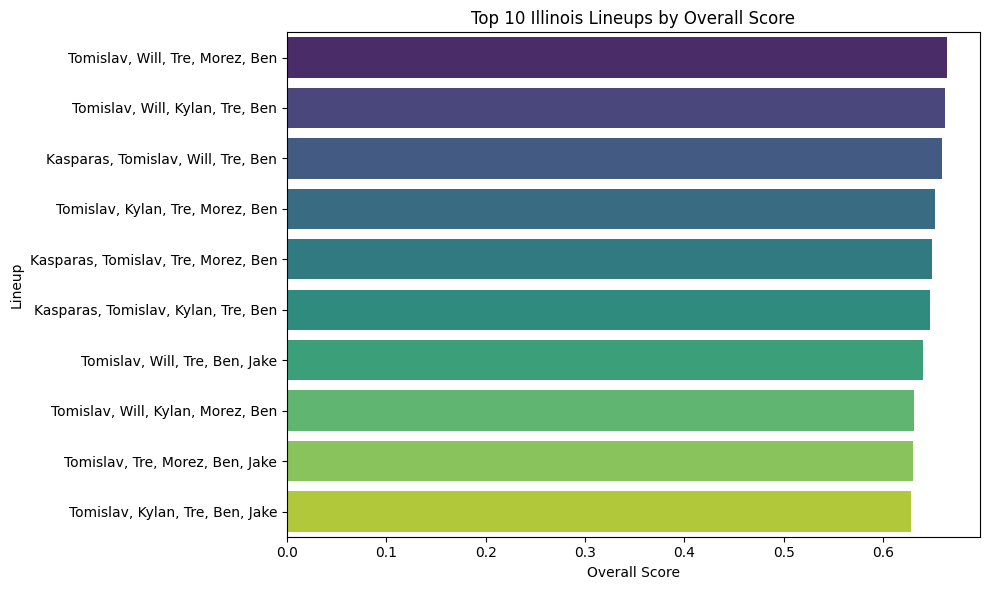

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10,6))
sns.barplot(data = sorted_lineups, x = 'Overall_Score', y = 'Lineup', palette = 'viridis')
plt.title('Top 10 Illinois Lineups by Overall Score')
plt.xlabel('Overall Score')
plt.ylabel('Lineup')
plt.tight_layout()
plt.show()

This horizontal bar chart makes it easy to:
- Compare lineup scores at a glance
- Identify which combinations are most effective
- Highlight the **most balanced and efficient lineup** at the top

This visual can directly support **coaching decisions** by showing which player combinations consistently produce better outcomes based on advanced statistical profiles. 

### 🔥 Heatmap: Breakdown of Top 5 Lineups by Metric

To better understand why certain lineups performed well, we visualize the **metric profile** of the top 5 lineups using a heatmap.

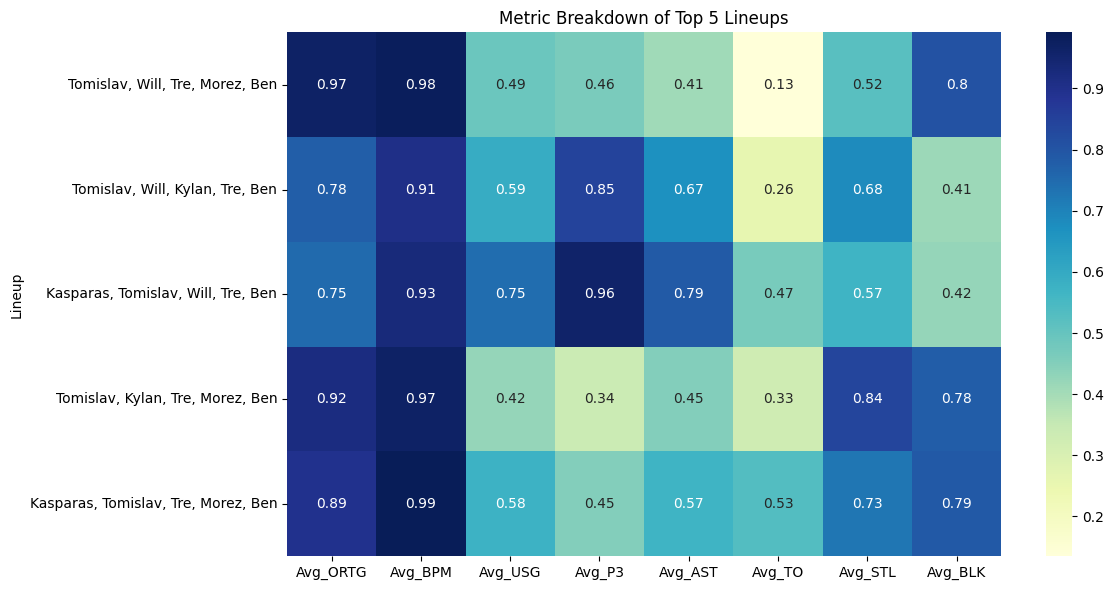

In [14]:
# Drop non-metric columns to get only the metrics
metric_df = sorted_lineups.drop(columns=["Lineup", "Overall_Score"])


# Select top 5 rows for heatmap (assuming already sorted)
heatmap_df = metric_df.iloc[:5].copy()

# Set a shortened lineup name as index from original DataFrame
heatmap_df.index = sorted_lineups["Lineup"].iloc[:5].apply(
    lambda x: ', '.join(n.split()[0] for n in x.split(', '))
)


plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_df, annot=True, cmap="YlGnBu")
plt.title("Metric Breakdown of Top 5 Lineups")
plt.tight_layout()
plt.show()

### 📋 What This Shows:
- Each row represents a top-performing lineup.
- Each column is a key metric.
- Darker shades indicate stronger performance in that metric.
- Annotations make it easy to compare values across lineups.

This chart allows coaches or analysts to quickly identify what makes each lineup effective, whether it's shooting, ball movement, defense, or overall efficiency. 

### 🧭 Radar Chart: Comparing Top 5 Lineups Across All Metrics

To complement the heatmap, we use a **radar chart** to visualize and compare how the top 5 lineups perform across all scoring metrics. 

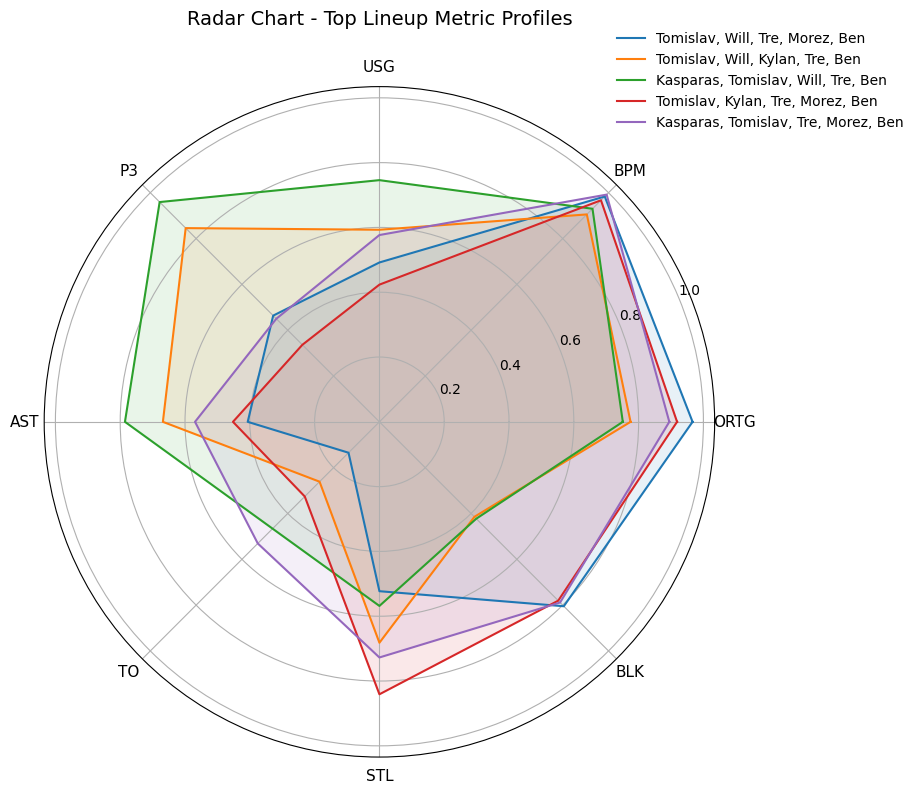

In [15]:
labels = heatmap_df.columns.tolist()
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint = False).tolist()
angles += angles[:1]

plt.figure(figsize = (10, 8))
for i, (index, row) in enumerate(heatmap_df.iterrows()):
    values = row.tolist()
    values += values[:1]
    plt.polar(angles, values, label = index)
    plt.fill(angles, values, alpha = 0.1)

plt.xticks(angles[:-1], [label.replace('Avg_', '') for label in labels], fontsize = 11)
plt.title('Radar Chart - Top Lineup Metric Profiles', size = 14, y = 1.08)
plt.legend(loc = 'upper right', bbox_to_anchor = (1.3, 1.1), frameon = False)
plt.tight_layout()
plt.show()

### 🧩 What This Chart Reveals: 
- Each colored shape represents a **top 5-man lineup**, mapped across key metrics like `ORTG`, `AST`, `TO`, `3P`, `BPM`, etc.
- The larger and more balanced the shape, the **more well-rounded** the lineup is.
- Spikes in particular areas show each lineup's **unique strengths**.

This visualization helps coaches see **not just which lineups are best overall**, but why, whether due to efficient scoring, ball movement, defense, or a combination of factors.

### 🎯 Shot Selection Efficiency: Top 5 Lineups

To better understand the scoring tendencies of the top 5 lineups, we analyze their average shooting percentages across different shot types:
- `DUNK%`
- `CLOSE2%`
- `FAR2%`
- `3P%`
- `2P%`
- `FT%`

In [16]:
top5 = sorted_lineups.sort_values(by="Overall_Score", ascending=False).head(5)

# For each lineup, calculate average shot stats across the 5 players
lineup_shots = []
for lineup in top5["Lineup"]:
    player_names = [p.strip() for p in lineup.split(',')]
    player_data = df[df["Player"].apply(lambda x: any(p in x for p in player_names))]
    avg_shots = player_data[["DUNK%", "CLOSE2%", "FAR2%", "3P%", "2P%", "FT%"]].mean()
    avg_shots["Lineup"] = lineup
    lineup_shots.append(avg_shots)

avg_df = pd.DataFrame(lineup_shots)

# Melt for plotting
long_df = avg_df.melt(id_vars="Lineup", var_name="Shot_Type", value_name="Success_Rate")

long_df

,Lineup,Shot_Type,Success_Rate
0,"Tomislav, Will, Tre, Morez, Ben",DUNK%,0.946207
1,"Tomislav, Will, Kylan, Tre, Ben",DUNK%,0.960000
2,"Kasparas, Tomislav, Will, Tre, Ben",DUNK%,0.960000
3,"Tomislav, Kylan, Tre, Morez, Ben",DUNK%,0.946207
4,"Kasparas, Tomislav, Tre, Morez, Ben",DUNK%,0.946207
5,"Tomislav, Will, Tre, Morez, Ben",CLOSE2%,0.684892
6,"Tomislav, Will, Kylan, Tre, Ben",CLOSE2%,0.679844
7,"Kasparas, Tomislav, Will, Tre, Ben",CLOSE2%,0.687330
8,"Tomislav, Kylan, Tre, Morez, Ben",CLOSE2%,0.681822
9,"Kasparas, Tomislav, Tre, Morez, Ben",CLOSE2%,0.689308


### 📋 What This Step Does: 
- For each of the top 5 lineups, it retrieves the 5 players' shooting stats.
- It then computes the **average success rate** for each shot type across the lineup.

This breakdown provides insight into how each lineup scores, whether through rim attacks, spacing, or free-throw generation. 

## 🏅 Phase 2: MVP Scoring & Player Impact Ranking 

In this section, we shift from lineup-level analysis to **individual player evaluation**. The goal is to calculate a **custom MVP Score** for each Illinois player based on a blend of advanced metrics, shooting efficiency, playmaing, and on-court impact.

#### 🔢 What We'll Do:
- Normalize player statistics to ensure fair comparison across all categories.
- Apply **custom weights** to each stat.
- Generate a ranked list of players based on their **overall impact**, identifying the **most valuable players** on the team.

This analysis will help coaches and staff understand which players are contributing the most across scoring, efficiency, and defensive disruption, and who may deserve more minutes, different roles, or tailored development plans.

Before calculating MVP scores, we reset the index of the filtered player dataset to ensure it's clean and sequential. This makes it easier to apply transformations and merge results later on. 

In [17]:
cleaned_df = filtered_df.reset_index(drop=True)

cleaned_df

,Player,ORTG,USG,PRPG,BPM,DUNK,CLOSE2,FAR2,P3,P2,FT,AST,TO,STL,BLK
0,Kasparas,109.3,25.6,3.8,5.4,1.000000,0.672566,0.339286,0.317647,0.562130,0.845238,26.0,25.4,1.5,0.8
1,Tomislav,120.8,21.4,3.8,9.5,1.000000,0.835821,0.468750,0.357143,0.619632,0.750000,15.8,15.4,1.2,4.0
2,Will,115.3,23.0,3.3,5.2,1.000000,0.650485,0.366071,0.326389,0.502326,0.724138,16.0,11.3,0.6,1.0
3,Kylan,111.3,20.9,3.2,4.8,1.000000,0.635135,0.307692,0.244755,0.566845,0.790210,18.8,18.1,2.0,0.7
4,Tre,123.5,18.6,3.1,6.2,1.000000,0.666667,0.404255,0.328571,0.587097,0.823529,6.0,12.8,1.0,1.4
5,Morez,127.3,17.8,2.5,6.7,0.931034,0.660377,0.500000,0.000000,0.641667,0.617978,2.7,13.6,1.3,5.5
6,Ben,118.3,13.1,2.2,5.0,0.800000,0.611111,0.414634,0.342541,0.474576,0.705882,5.6,8.0,1.0,2.2
7,Dra,112.0,18.1,1.4,1.3,1.000000,0.808511,0.482759,0.255102,0.684211,0.805556,5.8,13.6,1.2,0.3
8,Jake,118.1,13.9,0.8,2.2,0.000000,0.650000,0.000000,0.343750,0.619048,0.500000,5.5,10.6,0.2,1.5
9,Carey,76.5,15.9,-0.2,-4.6,0.000000,0.000000,0.428571,0.240000,0.375000,0.500000,1.5,19.4,0.0,3.3


To ensure all metrics contribute **equitably** to the MVP score, we normalize them using **Min-Max-Scaling**. This transforms every feature to a common range (0 to 1), eliminating issues caused by different unit scales. 

In [18]:
# Normalize features
features = cleaned_df.drop(columns=['Player'])
scaler = MinMaxScaler()
normalized_features = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

normalized_features

,ORTG,USG,PRPG,BPM,DUNK,CLOSE2,FAR2,P3,P2,FT,AST,TO,STL,BLK
0,0.645669,1.000,1.000,0.709220,1.000000,0.804678,0.678571,0.889412,0.605187,1.000000,1.000000,1.000000,0.75,0.096154
1,0.872047,0.664,1.000,1.000000,1.000000,1.000000,0.937500,1.000000,0.791150,0.724138,0.583673,0.425287,0.60,0.711538
2,0.763780,0.792,0.875,0.695035,1.000000,0.778259,0.732143,0.913889,0.411776,0.649227,0.591837,0.189655,0.30,0.134615
3,0.685039,0.624,0.850,0.666667,1.000000,0.759894,0.615385,0.685315,0.620435,0.840608,0.706122,0.580460,1.00,0.076923
4,0.925197,0.440,0.825,0.765957,1.000000,0.797619,0.808511,0.920000,0.685930,0.937120,0.183673,0.275862,0.50,0.211538
5,1.000000,0.376,0.675,0.801418,0.931034,0.790094,1.000000,0.000000,0.862411,0.341728,0.048980,0.321839,0.65,1.000000
6,0.822835,0.000,0.600,0.680851,0.800000,0.731151,0.829268,0.959116,0.322034,0.596349,0.167347,0.000000,0.50,0.365385
7,0.698819,0.400,0.400,0.418440,1.000000,0.967325,0.965517,0.714286,1.000000,0.885057,0.175510,0.321839,0.60,0.000000
8,0.818898,0.064,0.250,0.482270,0.000000,0.777679,0.000000,0.962500,0.789260,0.000000,0.163265,0.149425,0.10,0.230769
9,0.000000,0.224,0.000,0.000000,0.000000,0.000000,0.857143,0.672000,0.000000,0.000000,0.000000,0.655172,0.00,0.576923


### Compute MVP Scores Using Weighted Metrics

In [19]:
# Define weights again (you can modify as needed)
weights = {
    'BPM': 0.27,        # Overall impact (box-score based) – strong signal of value
    'ORTG': 0.15,       # Offensive efficiency
    'AST': 0.15,        # Playmaking
    'TO': -0.08,        # Penalize turnovers
    '3P%': 0.10,        # Shooting range / spacing
    '2P%': 0.06,        # Overall finishing ability
    'FT%': 0.05,        # Free throw reliability (late game, consistency)
    'STL': 0.10,        # Defensive disruption (steals)
    'BLK': 0.05,        # Rim protection
    'USG': -0.03,       # Light penalty for high usage (efficiency tradeoff)
    'PRPG': 0.07,       # Estimated on-court contribution (from BartTorvik)
    # Optional — keep these low if included:
    'CLOSE2%': 0.01,
    'FAR2%': 0.01,
    'DUNK%': 0.01
}


# Calculate the weighted score
normalized_features['Score'] = sum(
    normalized_features[col] * weights[col] for col in weights if col in normalized_features.columns
)

normalized_features

,ORTG,USG,PRPG,BPM,DUNK,CLOSE2,FAR2,P3,P2,FT,AST,TO,STL,BLK,Score
0,0.645669,1.000,1.000,0.709220,1.000000,0.804678,0.678571,0.889412,0.605187,1.000000,1.000000,1.000000,0.75,0.096154,0.478147
1,0.872047,0.664,1.000,1.000000,1.000000,1.000000,0.937500,1.000000,0.791150,0.724138,0.583673,0.425287,0.60,0.711538,0.599992
2,0.763780,0.792,0.875,0.695035,1.000000,0.778259,0.732143,0.913889,0.411776,0.649227,0.591837,0.189655,0.30,0.134615,0.450050
3,0.685039,0.624,0.850,0.666667,1.000000,0.759894,0.615385,0.685315,0.620435,0.840608,0.706122,0.580460,1.00,0.076923,0.486864
4,0.925197,0.440,0.825,0.765957,1.000000,0.797619,0.808511,0.920000,0.685930,0.937120,0.183673,0.275862,0.50,0.211538,0.456197
5,1.000000,0.376,0.675,0.801418,0.931034,0.790094,1.000000,0.000000,0.862411,0.341728,0.048980,0.321839,0.65,1.000000,0.498953
6,0.822835,0.000,0.600,0.680851,0.800000,0.731151,0.829268,0.959116,0.322034,0.596349,0.167347,0.000000,0.50,0.365385,0.442626
7,0.698819,0.400,0.400,0.418440,1.000000,0.967325,0.965517,0.714286,1.000000,0.885057,0.175510,0.321839,0.60,0.000000,0.294381
8,0.818898,0.064,0.250,0.482270,0.000000,0.777679,0.000000,0.962500,0.789260,0.000000,0.163265,0.149425,0.10,0.230769,0.302702
9,0.000000,0.224,0.000,0.000000,0.000000,0.000000,0.857143,0.672000,0.000000,0.000000,0.000000,0.655172,0.00,0.576923,-0.030288


#### 🧮 What This Step Does:
- Combines each player's **normalized stats** into a **single MVP Score** based on carefully chosen weights.
- Heavily emphasizes overall impact (`BPM`), offensive efficiency (`ORTG`), playmaking (`AST`), and defense (`STL`, `BLK`)
- Slightly penalizes **high usage** and **turnovers** to reward efficient, smart basketball.
- Shooting and finishing metrics are weighted to reflect **scoring versatility**.

The result is a fair, data-driven ranking of individual player value across all key dimensions, scoring, playmaking, efficiency, and defense. 

In [20]:
# Attach player names back
final_mvp_scores = pd.concat([cleaned_df[['Player']], normalized_features[['Score']]], axis=1)
final_mvp_scores = final_mvp_scores.sort_values(by='Score', ascending=False).reset_index(drop=True)

final_mvp_scores

,Player,Score
0,Tomislav,0.599992
1,Morez,0.498953
2,Kylan,0.486864
3,Kasparas,0.478147
4,Tre,0.456197
5,Will,0.450050
6,Ben,0.442626
7,Jake,0.302702
8,Dra,0.294381
9,Carey,-0.030288


### 🏁 Final MVP Rankings: Illinois Men’s Basketball

After calculating the weighted MVP scores for each player based on advanced metrics, the above table shows the top contributors for the Illinois Men's Basketball team. 

#### 🔍 Interpretation:
- **Tomislav** ranks as the clear MVP based on a blend of efficiency, overall impact (BPM), and scoring versatility.
- **Morez** and **Kylan** round out the top 3, reflecting strong two-way contributors and consistent performance.
- Players like **Kasparas**, **Tre**, and **Will** are clustered closely, showing they provide meaningful value as complementary starters or rotation players.
- The bottom ranks indicate either limited playing time or inefficiency across multiple categories.

This score helps quantify **who contributes most to winning**, not just scoring, but in facilitating, defending, and playing efficiently within the team structure.

## 📊 Phase 3: Opponent Performance Analysis

To support **opponent scouting and game preparation**, we analyze how Illinois performed in each game during the season, focusing on both offensive and defensive efficiency against various opponent styles. 

In [21]:
opponent_df = pd.read_csv('Illinois_opponents.csv')

opponent_df.head()

,Opponent,Date,Goal,LostGoal,ADJO,ADJD,EFF_O,EFG%_O,TO%_O,OR%_O,...,3P_O,EFF_D,EFG%_D,TO%_D,OR%_D,FTR_D,2P_attemp_D,2P_D,3P_attemp_D,3P_D
0,Eastern Illinois,4-Nov,112,67,125.7,101.9,134.4,60.9,15.6,38.9,...,16,80.4,41.2,9.6,12.0,36.8,56,22,12,4
1,SIU Edwardsville,8-Nov,90,58,126.5,96.1,132.0,56.3,7.3,42.1,...,15,85.1,34.2,13.2,38.0,23.3,49,16,24,6
2,Oakland,13-Nov,66,54,93.6,79.2,96.1,48.2,26.2,38.7,...,7,78.7,41.5,26.2,24.2,20.8,28,16,25,4
3,Alabama,20-Nov,87,100,116.4,104.0,107.0,52.1,16.0,31.8,...,10,123.0,59.3,8.6,18.9,17.3,41,28,34,11
4,Maryland Eastern Shore,23-Nov,87,40,98.6,71.8,119.7,51.4,12.4,44.2,...,10,55.0,25.7,20.6,25.9,11.8,48,10,20,5


This dataset includes **game-by-game stats** for Illinois and its opponents of the 2024-25 season. Each row represents a single match and contains metrics like: 
- Points scored and allowed
- Adjusted offensive/defensive efficiency
- Turnover and rebound rates

This data will help us cluster opponents, identify common patterns in wins and losses, and recommend lineup adjustments based on opponent types. 

In [22]:
opponent_df.columns = opponent_df.columns.str.strip().str.replace(" ", "_")

opponent_df["2P%_D"] = opponent_df['2P_D'] / opponent_df['2P_attemp_D']
opponent_df['3P%_D'] = opponent_df['3P_D'] / opponent_df['3P_attemp_D']
opponent_df['2P%_O'] = opponent_df['2P_O'] / opponent_df['2P_attemp_O']
opponent_df['3P%_O'] = opponent_df['3P_O'] / opponent_df['3P_attemp_O']

opponent_df['Result'] = np.where(opponent_df['Goal'] > opponent_df['LostGoal'], 'W', 'L')

opponent_offense_df = opponent_df[['Opponent', 'LostGoal', 'ADJD', 'EFF_D', 'TO%_D', "FTR_D", "OR%_D","2P_attemp_D", "2P%_D", "3P_attemp_D", "3P%_D", 'Result']]

illinois_offense_df = opponent_df[['Opponent', 'Goal', 'ADJO', 'EFF_O', 'TO%_O', "FTR_O", "OR%_O","2P_attemp_O", "2P%_O", "3P_attemp_O", "3P%_O", 'Result']]


In [23]:
opponent_df.head()

,Opponent,Date,Goal,LostGoal,ADJO,ADJD,EFF_O,EFG%_O,TO%_O,OR%_O,...,FTR_D,2P_attemp_D,2P_D,3P_attemp_D,3P_D,2P%_D,3P%_D,2P%_O,3P%_O,Result
0,Eastern Illinois,4-Nov,112,67,125.7,101.9,134.4,60.9,15.6,38.9,...,36.8,56,22,12,4,0.392857,0.333333,0.681818,0.380952,W
1,SIU Edwardsville,8-Nov,90,58,126.5,96.1,132.0,56.3,7.3,42.1,...,23.3,49,16,24,6,0.326531,0.250000,0.520000,0.394737,W
2,Oakland,13-Nov,66,54,93.6,79.2,96.1,48.2,26.2,38.7,...,20.8,28,16,25,4,0.571429,0.160000,0.533333,0.280000,W
3,Alabama,20-Nov,87,100,116.4,104.0,107.0,52.1,16.0,31.8,...,17.3,41,28,34,11,0.682927,0.323529,0.536585,0.333333,L
4,Maryland Eastern Shore,23-Nov,87,40,98.6,71.8,119.7,51.4,12.4,44.2,...,11.8,48,10,20,5,0.208333,0.250000,0.676471,0.250000,W


### 🧠 What This Step Does:
- Cleans column names to prevent syntax errors in future steps.
- Computes Illinois and opponent shooting efficiency: 2P % and 3P %.
- Adds a `Result` column to flag each game as a win or loss.
- Creates two subsets:
    - `opponent_offense_df`: How well Illinois defended against each opponent.
    - `illinois_offense_df`: How well Illinois performed offensively in each game.
 
These engineered features will power upcoming analyses, like **opponent clustering, game outcome patterns**, and **adjusted efficiency breakdowns**, to help identify what types of teams Illinois thrives against or struggles with. 

### Filter Games Where Illinois Lost

In [24]:
lost_df = opponent_df[opponent_df['Result'] == 'L']
lost_df

,Opponent,Date,Goal,LostGoal,ADJO,ADJD,EFF_O,EFG%_O,TO%_O,OR%_O,...,FTR_D,2P_attemp_D,2P_D,3P_attemp_D,3P_D,2P%_D,3P%_D,2P%_O,3P%_O,Result
3,Alabama,20-Nov,87,100,116.4,104.0,107.0,52.1,16.0,31.8,...,17.3,41,28,34,11,0.682927,0.323529,0.536585,0.333333,L
7,Northwestern,6-Dec,66,70,99.5,84.2,87.8,44.0,14.6,17.1,...,23.6,51,24,21,4,0.470588,0.190476,0.484848,0.264706,L
9,Tennessee,14-Dec,64,66,113.2,89.1,97.4,33.3,16.7,32.4,...,45.2,38,14,24,6,0.368421,0.250000,0.392857,0.173913,L
15,USC,11-Jan,72,82,99.8,98.4,94.6,42.7,19.7,26.3,...,16.9,51,29,14,5,0.568627,0.357143,0.533333,0.218750,L
17,Michigan.ST,19-Jan,76,80,126.1,96.7,106.4,46.2,13.6,35.7,...,41.5,55,25,10,3,0.454545,0.300000,0.547619,0.208333,L
18,Maryland,23-Jan,70,91,105.0,100.5,87.9,42.6,20.1,21.6,...,31.9,60,33,12,3,0.550000,0.250000,0.515152,0.214286,L
20,Nebraska,26-Jan,74,80,101.8,94.5,93.6,42.5,21.5,40.8,...,23.1,58,26,20,5,0.448276,0.250000,0.516129,0.238095,L
22,Rutgers,5-Feb,73,82,110.2,108.5,106.4,46.2,19.0,42.9,...,57.6,43,18,16,6,0.418605,0.375000,0.567568,0.214286,L
25,Michigan.ST,15-Feb,65,79,117.3,101.3,96.0,43.7,16.3,30.8,...,19.1,56,28,12,5,0.500000,0.416667,0.566667,0.212121,L
26,Winsconsin,18-Feb,74,95,118.1,110.2,102.7,51.7,19.4,25.7,...,33.8,41,24,24,10,0.585366,0.416667,0.533333,0.333333,L


In this step, we extract all games where Illinois **lost** to better understand **which opponent styles or statistical profiles** posed challenges.

This will allow us to:
- Identify common patterns across losses
- Compare them against wins to detect critical win/loss factors
- Inform adjustments to lineup strategy or scouting reports based on opponent tendencies

From this filtered data, we can now analyze:
- Illinois's offensive struggles in losses
- Opponent strengths that contributed 

### Segment Opponents Based on Game Metrics

To better understand the **types of teams Illinois faced**, we perform **clustering** using key statistical features from each game. 

In [25]:
from sklearn.cluster import KMeans

In [26]:
features = ['EFF_O', '2P%_D', '3P%_D', 'OR%_D', 'EFF_D','FTR_O', 'TO%_O', 'TO%_D']
X = opponent_df[features].copy()

#### 🧠 What These Features Represent:
- `EFF_O` and `EFF_D`: Offensive and defensive efficiency
- `2P%_D`, `3P%_D`: Opponent's shooting efficiency
- `OR%_D`: Opponent offensive rebounding rate
- `FTR_O`: Free throw rate drawn by Illinois
- `TO%_O`, `TO%_D`: Turnover rates for both Illinois and opponent

By clustering teams based on these attributes, we can identify **district opponent types**, such as fast-paced scorers, tough defenders, or high-pressure teams, and analyze **Illinois's success against each cluster**.

### Standardize Opponent Features for Clustering

We apply **standardization** to the selected features so that no single metric dominates the clustering process due to scale differences. 

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [28]:
X_scaled

scaled_df = pd.DataFrame(X_scaled, index = opponent_df.index, columns = ('EFF_O', '2P%_D', '3P%_D', 'OR%_D', 'EFF_D', 'FTR_O', 'TO%_O', 'TO%_D'))

scaled_df.head()

,EFF_O,2P%_D,3P%_D,OR%_D,EFF_D,FTR_O,TO%_O,TO%_D
0,1.097838,-0.689132,0.049025,-1.596549,-1.096595,2.878977,-0.088164,-0.516207
1,0.962462,-1.338990,-0.809725,1.402130,-0.867092,0.734892,-1.917557,0.154330
2,-1.062544,1.060487,-1.737176,-0.189477,-1.179607,-0.317659,2.248171,2.575715
3,-0.447709,2.152932,-0.052004,-0.800746,0.983587,-0.091555,0.000000,-0.702468
4,0.268658,-2.497071,-0.809725,0.006591,-2.336892,-0.832239,-0.793472,1.532657


#### ✅ Why Standardization? 
Clustering algorithms like K-Means rely on **Euclidean distance**, which is highly sensitive to magnitude. Standardizing ensures that metrics like `EFF_O` and `TO%_D`, which have very different ranges, are treated **equitably** in the model.

Next, we will determine the optimal number of clusters and apply K-Means clustering to segment opponents by style and difficulty. 

In [29]:
scaled_df.dtypes

EFF_O    float64
2P%_D    float64
3P%_D    float64
OR%_D    float64
EFF_D    float64
FTR_O    float64
TO%_O    float64
TO%_D    float64
dtype: object

### Create Composite Scores for Clustering

To simplify interpretation and enable clearer clustering, we create three key scores from our standardized features:
- `Offense_Score`: How potent the opponent's offense is, based on their offensive efficiency and our defensive resistance.
- `Defense_Score`: How tough the opponent is defensively, especially in terms of turnover pressure and free throw rate allowed.
- `TurnOver_Score`: Compares how turnover-prone we were versus how effective the opponent was at forcing them, positive values mean we struggled more than they caused. 

In [30]:
scaled_df['Offense_Score'] = (0.4 * scaled_df['EFF_O'] + 0.25 * scaled_df['2P%_D'] +
                                0.25 * scaled_df['3P%_D'] + 0.1 * scaled_df['OR%_D'])

scaled_df['Defense_Score'] = (0.5 * scaled_df['EFF_D'] + 0.3 * scaled_df['TO%_O'] + 0.2 * scaled_df['FTR_O'])

scaled_df['TurnOver_Score'] = scaled_df['TO%_O'] - scaled_df['TO%_D']

These new features will make it easier to **cluster opponents** into meaningful playstyle buckets, like high-pressure defenses or efficient offenses. 

### Finding the Optimal Number of Clusters

To segment Illinois opponents based on their offensive and defensive profiles, we used K-Means clustering. However, choosing the right number of clusters is crucial.

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/joblib/externals/loky/backend/context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/joblib/externals/loky/backend/context.py", line 217, in _count_physical_cores
    raise ValueError(
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of 

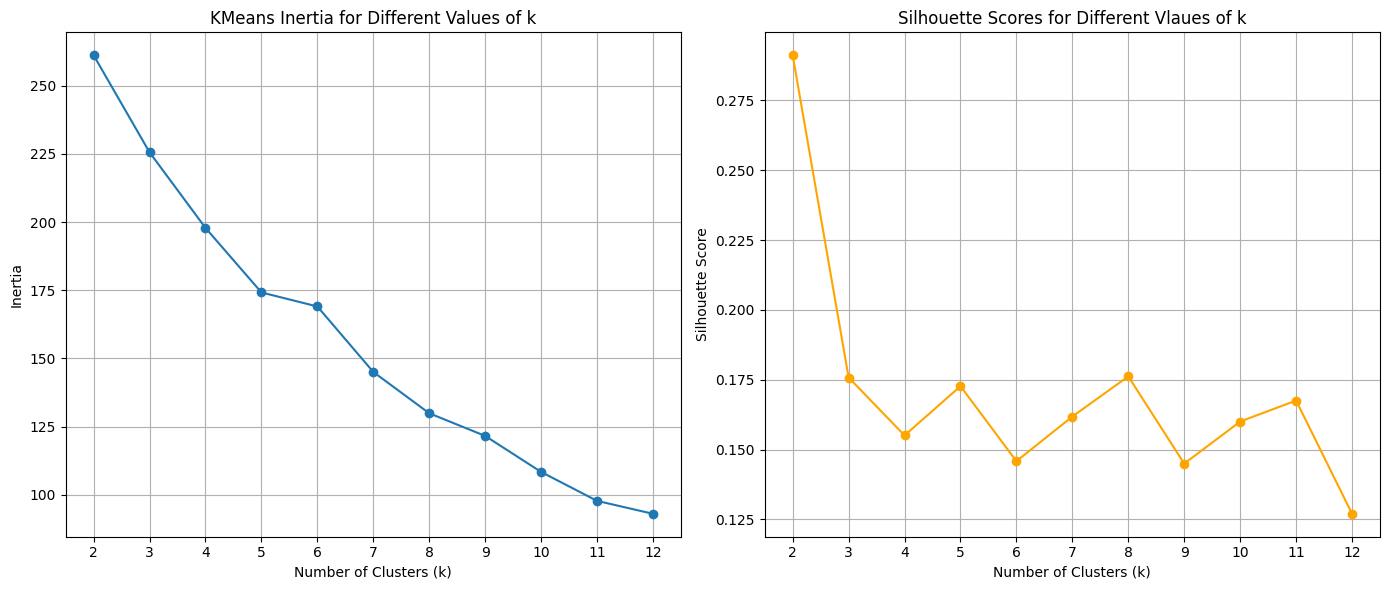

In [31]:
from sklearn.metrics import silhouette_score
max_k  =12

inertia = []
silhouette_scores = []
k_values = range(2, max_k +1)

for k in k_values:
    kmeans = KMeans(n_clusters = k, random_state = 42, max_iter = 1000)
    cluster_labels = kmeans.fit_predict(scaled_df)
    sil_score = silhouette_score(scaled_df, cluster_labels)
    silhouette_scores.append(sil_score)
    inertia.append(kmeans.inertia_)

plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
plt.plot(k_values, inertia, marker = 'o')
plt.title('KMeans Inertia for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)


plt.subplot(1,2,2)
plt.plot(k_values, silhouette_scores, marker = 'o', color = 'orange')
plt.title('Silhouette Scores for Different Vlaues of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()

We evaluated the following:
1. **Inertia**:
    - Measures how tightly the data points in a cluster are packed.
    - We look for the elbow point where the rate of inertia decreases sharply slows which suggests a good balance between complexity and fit.
    - In the left plot, the inertia curve starts flattening around k = 4 to 5
2. ** Silhouette Score**:
   - Measures how well-separated the clusters are. A higher silhouette score means better-defined clusters.
   - In the right plot,  k = 2 has the highest silhouette score, but it may be too broad.

Based on both metrics, k = 3 or 4 seems optimal for segmenting opponents by style.
We will use k = 3 in this project, since the data is not that large. 

### Opponent Segmentation with K-Means Clustering

After scaling the opponent stats, I applied K-Means clustering to group opponents into categories based on:
- Offensive metrics
- Defensive resistance
- Derived scores like `Offense_Score`, `Defense_Score`, and `TurnOver_Score`

In [32]:
kmeans = KMeans(n_clusters = 3, max_iter= 600, n_init= 20, random_state = 42)

clusters = kmeans.fit_predict(scaled_df)

In [33]:
scaled_df['Cluster'] = clusters

scaled_df.head()

,EFF_O,2P%_D,3P%_D,OR%_D,EFF_D,FTR_O,TO%_O,TO%_D,Offense_Score,Defense_Score,TurnOver_Score,Cluster
0,1.097838,-0.689132,0.049025,-1.596549,-1.096595,2.878977,-0.088164,-0.516207,0.119454,0.001049,0.428044,1
1,0.962462,-1.338990,-0.809725,1.402130,-0.867092,0.734892,-1.917557,0.154330,-0.011981,-0.861835,-2.071887,2
2,-1.062544,1.060487,-1.737176,-0.189477,-1.179607,-0.317659,2.248171,2.575715,-0.613137,0.021116,-0.327544,0
3,-0.447709,2.152932,-0.052004,-0.800746,0.983587,-0.091555,0.000000,-0.702468,0.266074,0.473483,0.702468,0
4,0.268658,-2.497071,-0.809725,0.006591,-2.336892,-0.832239,-0.793472,1.532657,-0.718577,-1.572936,-2.326129,2


Each opponent is now tagged with a **Cluster label**. These clusters represent distinct opponent profiles, such as:
- Cluster 0: High defensive resistance but possibly weaker offense
- Cluster 1: Balanced teams or moderate strength overall
- Cluster 2: Vulnerable teams defensively or turnover-prone offenses.

This clustering allows us to tailor lineup or game strategy depending on the opponent's style and strengths. 

### 3D Visualization of Opponent Clusters

To better understand the segmentation, I visualized the clusters using a 3D scatter plot with the following axes:
- X-axis: Offense Score (quality of Illinois' offensive performance vs opponent)
- Y-axis: Defense Score (quality of opponent's defensive resistance)
- Z-axis: Turnover Score (turnover differential impact)

Each point represents one opponent and is color-coded by cluster:
- **🟦 Cluster 0**
- **🟧 Cluster 1**
- **🟩 Cluster 2**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


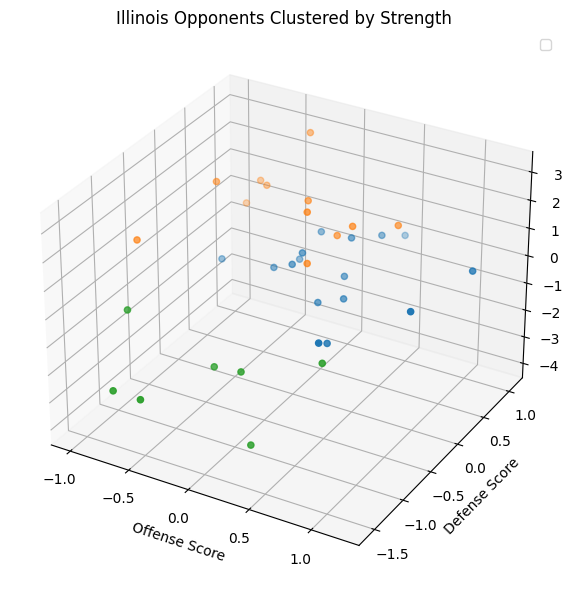

In [34]:
cluster_colors = {
    0: '#1f77b4',  # blue
    1: '#ff7f0e',  # orange
    2: '#2ca02c',  # green
}

colors =  scaled_df['Cluster'].map(cluster_colors)

fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(projection = '3d')
scatter = ax.scatter(scaled_df['Offense_Score'], scaled_df['Defense_Score'], scaled_df['TurnOver_Score'], c = colors, marker = 'o')

ax.set_xlabel('Offense Score')
ax.set_ylabel('Defense Score')
ax.set_zlabel("TurnOver Score")
ax.set_title('Illinois Opponents Clustered by Strength')
ax.legend()
plt.tight_layout()
plt.show()

This plot helps visually separate tough opponents from more beatable ones - a useful step for aligning lineups to matchup types in the next phase. 

#### Understanding Cluster Characteristics

To explore how the clusters differ in playstyle and performance, I plotted violin plots for each of the three main score components. 

This visualization helps to diagnose what defines each opponent cluster, whether it's their defensive dominance, poor offense, or turnover impact.

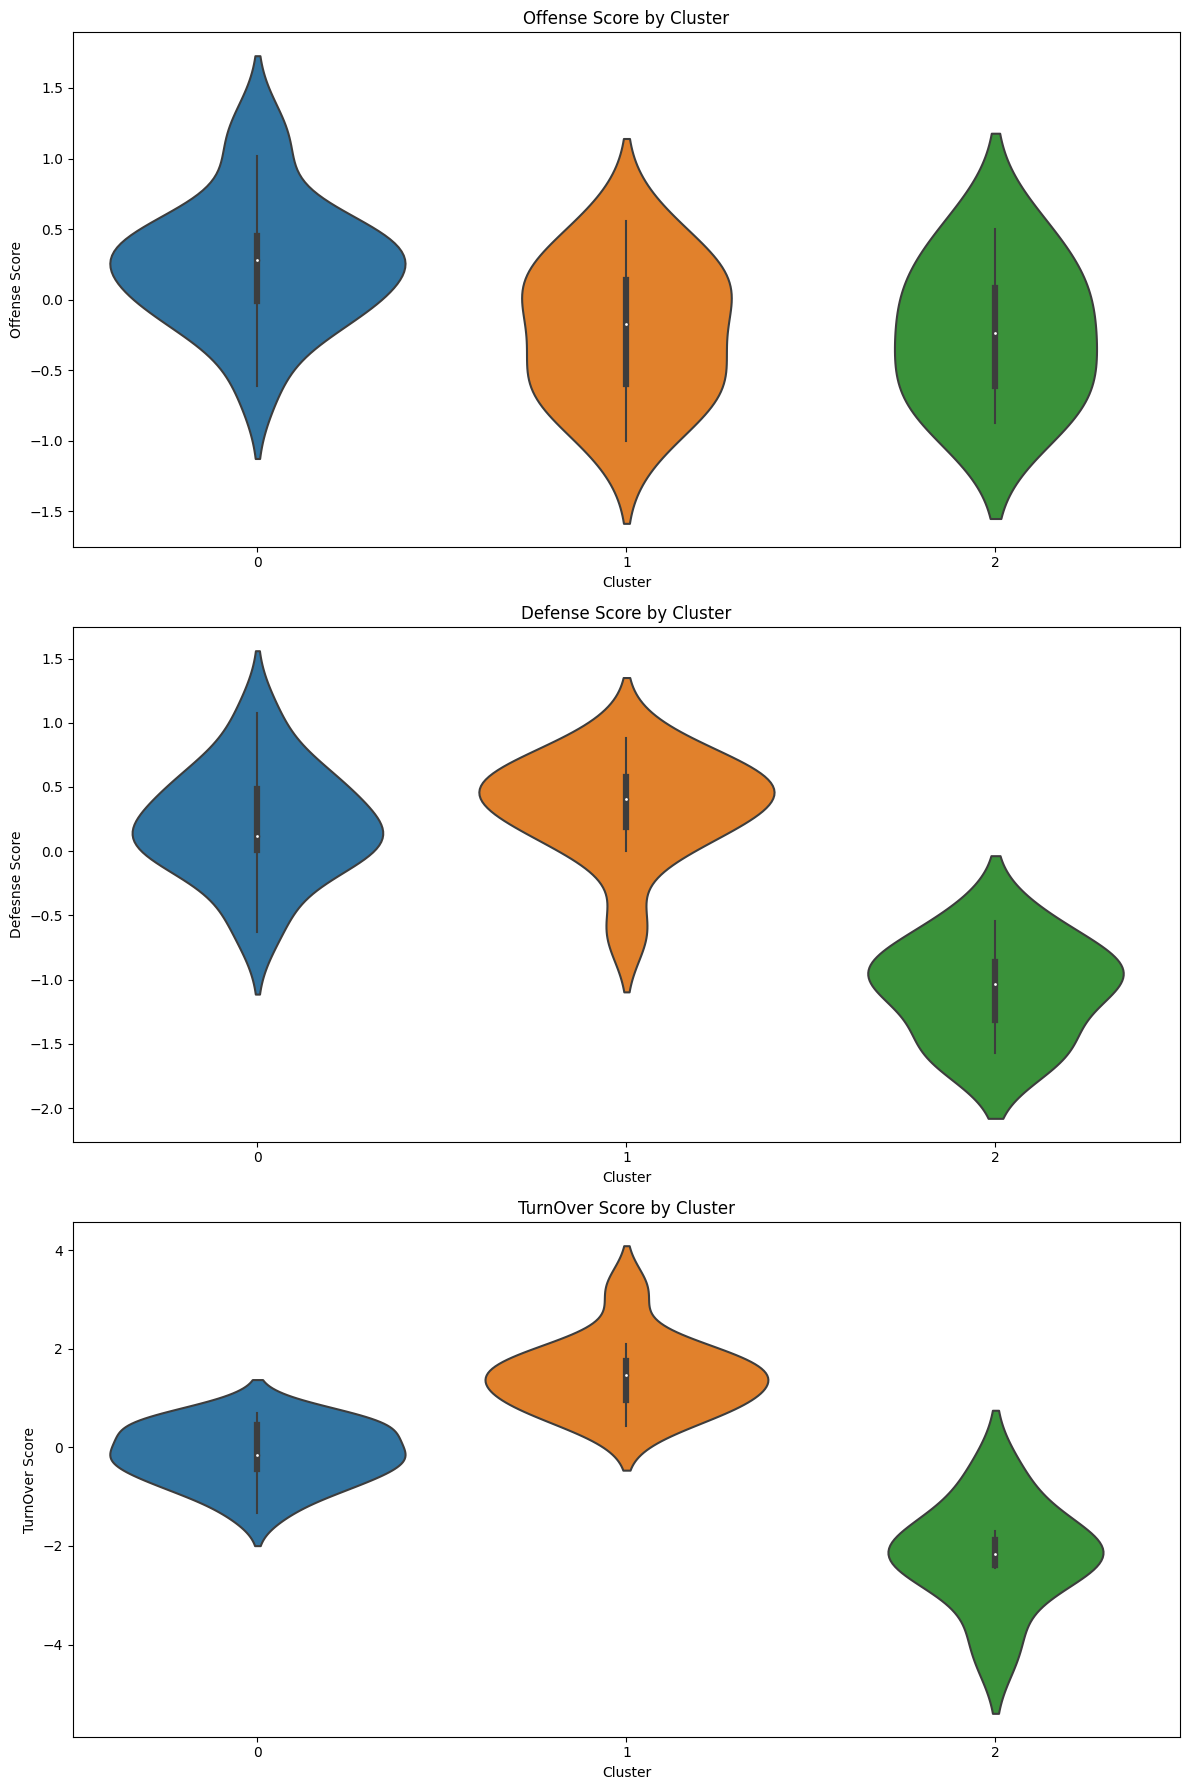

In [35]:
plt.figure(figsize = (12, 18))

plt.subplot(3,1,1)
sns.violinplot(x = 'Cluster', y = 'Offense_Score', data = scaled_df, palette = cluster_colors)
plt.title('Offense Score by Cluster')
plt.ylabel('Offense Score')

plt.subplot(3,1,2)
sns.violinplot(x = 'Cluster', y = 'Defense_Score', data = scaled_df, palette = cluster_colors)
plt.title('Defense Score by Cluster')
plt.ylabel('Defesnse Score')

plt.subplot(3,1,3)
sns.violinplot(x = 'Cluster', y = 'TurnOver_Score', data = scaled_df, palette = cluster_colors)
plt.title('TurnOver Score by Cluster')
plt.ylabel('TurnOver Score')

plt.tight_layout()
plt.show()

In [36]:
opponent_df['Cluster'] = clusters

In [37]:
for cluster_id in sorted(opponent_df['Cluster'].unique()):
    print(f"\nCluster {cluster_id}:")
    print(opponent_df[opponent_df['Cluster'] == cluster_id]['Opponent'].tolist())


Cluster 0:
['Oakland ', 'Alabama', 'Arkansas', 'Winsconsin', 'Oregon', 'Washington', 'USC', 'Michigan.ST', 'Rutgers', 'Minnesota', 'Michigan.ST', 'Winsconsin', 'Duke', 'Michigan ', 'Purdue', 'Iowa']

Cluster 1:
['Eastern Illinois', 'Northwestern', 'Tennessee', 'Missouri', 'Maryland', 'Northwestern', 'Nebraska', 'Ohio.ST', 'UCLA', 'Maryland', 'Xavier', 'Kentucky']

Cluster 2:
['SIU Edwardsville', 'Maryland Eastern Shore', 'Little Rock', 'Chicago.ST', 'Penn.ST', 'Indiana', 'Iowa']


### 🔵 Cluster 0 (Blue):
   - **Turnover Score**: Moderate
   - **Defense Score**: Average
   - **Offense Score**: High

✅ Interpretation:
- Balanced overall but lean toward **strong offensive production**.
- Not elite in defense or turnover generation.

📌 Lineup Strategy:
- Strong **on-ball defenders**, especially against perimeter threats.
- **Rim protectors** and **defensive rebounders** are key.
- Match offensive firepower: include Illinois's **best 3PT shooters and scores**. 

### 🟠 Cluster 1 (Orange): 
- **Turnover Score**: Very High: This cluster **force many turnovers** or **commit few**.
- **Defense Score**: High: **strong defensive teams**.
- **Offense Score**: Low: **weak offensive teams**.

✅ Interpretation:
- Disruptive defenses that rely on forcing mistakes.
- Less efficient scoring teams, so you can risk less defensively. 

📌 Lineup Strategy:
- Prioritize **ball handlers**, **low-turnover players**, and **guards with high composure**.
- Bigs who can **pass out of double teams** or traps.
- Less defensive pressure is needed, so you can go with more offensively skilled players.

### 🟢 Cluster 2 (Green):
- Turnover Score: Low (even negative).
- Defense Score: Very Low: **Weak defensive teams**.
- Offense Score: Moderate.

✅ Interpretation:
- These are **defensive liabilities**: great teams to score against.
- Offense is average and they don't pressure the ball. 

📌 Lineup Strategy:
- Maximize offensive efficiency: **Your highest offensive-rated lineup**.
- You can sacrifice some defense for **better spacing, shooting, and pace**.
- Run more transitions - they won't stop you. 

#### Evaluating Illinois Performance by Opponent Cluster

To understand how effective Illinois has been against different opponent types, I calculated the **winning percentage** against each cluster. 

In [38]:
WP_Cluster_0 = sum(opponent_df[opponent_df['Cluster'] == 0]['Result'] == "W") / opponent_df[opponent_df['Cluster'] == 0].shape[0]
WP_Cluster_1 = sum(opponent_df[opponent_df['Cluster'] == 1]['Result'] == 'W') / opponent_df[opponent_df['Cluster'] == 1].shape[0]
WP_Cluster_2 = sum(opponent_df[opponent_df['Cluster'] == 2]['Result'] == 'W') / opponent_df[opponent_df['Cluster'] == 2].shape[0]

print('Winning Ratio against Cluster 0:', WP_Cluster_0)
print('Winning Ratio against Cluster 1:', WP_Cluster_1)
print('Winning Ratio against Cluster 2:', WP_Cluster_2)

Winning Ratio against Cluster 0: 0.5625
Winning Ratio against Cluster 1: 0.5
Winning Ratio against Cluster 2: 1.0


**🟦 Cluster 0 (Balanced Offense)**
🟢 Winning %: 56.25%
➡️ Competitive games. Opponents in this group are strong offensively, and Illinois performs just slightly above average against them.

**🟧 Cluster 1 (Disruptive Defenders)**
🟡 Winning %: 50.0%
➡️ Even win-loss ratio. These teams’ defensive pressure might be causing issues for Illinois.

**🟩 Cluster 2 (Weak Defenders)**
🟢 Winning %: 100.0%
➡️ Total dominance. Illinois capitalizes fully on teams that are poor defensively and weak in turnover creation.

**Conclusion**:
Illinois performs **best against weak defensive teams** (Cluster 2), and struggles more with **defensive pressure teams** (Cluster 1). These results validate the need for tailored lineup strategies by opponent cluster.

In [39]:
lineup_df.head()

,Avg_ORTG,Avg_BPM,Avg_USG,Avg_DUNK,Avg_CLOSE2,Avg_FAR2,Avg_P3,Avg_P2,Avg_FT,Avg_AST,Avg_TO,Avg_STL,Avg_BLK,Lineup
0,116.04,6.22,21.90,1.000000,0.692135,0.377211,0.314901,0.567606,0.786623,16.52,16.60,1.26,1.58,"Kasparas, Tomislav, Will, Kylan, Tre"
1,116.80,6.32,21.74,0.986207,0.690877,0.396360,0.249187,0.578520,0.745513,15.86,16.76,1.32,2.40,"Kasparas, Tomislav, Will, Kylan, Morez"
2,115.00,5.98,20.80,0.960000,0.681024,0.379287,0.317695,0.545102,0.763094,16.44,15.64,1.26,1.74,"Kasparas, Tomislav, Will, Kylan, Ben"
3,113.74,5.24,21.80,1.000000,0.720504,0.392912,0.300207,0.587029,0.783028,16.48,16.76,1.30,1.36,"Kasparas, Tomislav, Will, Kylan, Dra"
4,114.96,5.42,20.96,0.800000,0.688802,0.296360,0.317937,0.573996,0.721917,16.42,16.16,1.10,1.60,"Kasparas, Tomislav, Will, Kylan, Jake"


### 🟦 Best Illinois Lineups Against Cluster 0 (Strong Offensive Teams)

Now that we know Cluster 0 opponents are strong offensively but not overwhelming defensively, Illinois needs **balanced lineups** that:
- Can outscore efficiently (high ORTG)
- Maintain positive box-score impact (BPM)
- Contribute in playmaking, steals, blocks, and finishing (AST, STL, BLK, DUNK)

To find the best lineups for Cluster 0:
1. I normalized key performance metrics using `MinMaxScaler`.
2. I created a **weighted score** that prioritizes offensive efficiency but still considers overall impact and defense.
3. Finally, I sorted the lineups by this score. 

In [40]:
# Normalize relevant stats
from sklearn.preprocessing import MinMaxScaler

features = ['Avg_ORTG', 'Avg_BPM', 'Avg_AST', 'Avg_STL', 'Avg_BLK', 'Avg_DUNK']
scaler = MinMaxScaler()
lineup_df_scaled = lineup_df.copy()
lineup_df_scaled[features] = scaler.fit_transform(lineup_df[features])

# Create a custom score: weighted sum of normalized metrics
lineup_df_scaled['Cluster0_Score'] = (
    lineup_df_scaled['Avg_ORTG'] * 0.4 +
    lineup_df_scaled['Avg_BPM'] * 0.2 +
    lineup_df_scaled['Avg_AST'] * 0.1 +
    lineup_df_scaled['Avg_STL'] * 0.1 +
    lineup_df_scaled['Avg_BLK'] * 0.1 +
    lineup_df_scaled['Avg_DUNK'] * 0.1
)

# Sort by this score
best_lineups_cluster_0 = lineup_df_scaled.sort_values(by='Cluster0_Score', ascending=False)
print(best_lineups_cluster_0[['Cluster0_Score', 'Avg_ORTG', 'Avg_BPM', 'Lineup']].head(5))

     Cluster0_Score  Avg_ORTG   Avg_BPM                                 Lineup
21         0.858565  0.811005  0.983539  Kasparas, Tomislav, Kylan, Tre, Morez
161        0.856369  0.918660  0.967078       Tomislav, Kylan, Tre, Morez, Ben
36         0.852894  0.894737  0.991770    Kasparas, Tomislav, Tre, Morez, Ben
126        0.850539  0.882775  0.975309      Tomislav, Will, Kylan, Tre, Morez
6          0.847064  0.858852  1.000000   Kasparas, Tomislav, Will, Tre, Morez


**Conclusion**: 
These lineups are excellent choices against well-rounded but offensively driven teams. They combine scoring punch with supporting stats in defense and playmaking. 

### 🟠 Best Illinois Lineups Against Cluster 1 (Elite Defensive Teams)

Cluster 1 teams are **defensive specialists**. They thrive on:
- Forcing **turnovers**
- Playing tight **half-court defense**
- Slowing down the pace and limiting easy baskets.

To counter them, Illinois needs **composed, efficient, and smart lineups**. So I built a custom scoring formula that prioritizes:
- Low turnovers
- Good ball movement
- 3PT shooting
- Offensive efficiency
- Composure under pressure

In [41]:
features = ['Avg_TO', 'Avg_AST', 'Avg_P3', 'Avg_ORTG', 'Avg_USG', 'Avg_BPM']
scaler = MinMaxScaler()
scaled = lineup_df.copy()
scaled[features] = scaler.fit_transform(scaled[features])

# Step 3: Build Cluster 1 Strategy Score
scaled['Cluster1_Score'] = (
    -scaled['Avg_TO'] * 0.3 +  # Turnovers should be penalized
     scaled['Avg_AST'] * 0.2 +
     scaled['Avg_P3'] * 0.2 +
     scaled['Avg_ORTG'] * 0.2 +
     scaled['Avg_USG'] * 0.1 +
     scaled['Avg_BPM'] * 0.1
)

In [42]:
# Sort by this score
best_lineups_cluster_1 = scaled.sort_values(by='Cluster1_Score', ascending=False)
print(best_lineups_cluster_1[['Cluster1_Score', 'Avg_ORTG', 'Avg_BPM', 'Lineup']].head(5))

     Cluster1_Score  Avg_ORTG   Avg_BPM                              Lineup
146        0.562847  0.856459  0.798354      Tomislav, Will, Tre, Ben, Jake
127        0.529237  0.775120  0.905350     Tomislav, Will, Kylan, Tre, Ben
7          0.526876  0.751196  0.930041  Kasparas, Tomislav, Will, Tre, Ben
145        0.506262  0.783493  0.761317       Tomislav, Will, Tre, Ben, Dra
136        0.506198  0.710526  0.740741    Tomislav, Will, Kylan, Ben, Jake


**Conclusion**:
These lineups offer ball security, high playmaking, and offensive balance, perfect to neutralize teams that thrive on chaos. 

### 🟢 Best Illinois Lineups Against Cluster 2 (Weak Defensive Teams)

Cluster 2 opponents are defensive liabilities with:
- Very poor defense
- Low turnover pressure
- Average-to-decent offense, meaning games could turn into shootouts.

Against them, Illinois should **maximize offensive efficiency**, there's less need for defensive specialists. 

🔍 So in this step, I designed a Cluster 2 score using the following logic:
- Heavily weight **Offensive Rating** and **3PT shooting**
- Incorporate all-around efficiency: 2P%, AST, FT%, USG, and BPM
- Prioritize **scoring power, pace, and spacing**

In [43]:
features = ['Avg_ORTG', 'Avg_P3', 'Avg_P2', 'Avg_AST', 'Avg_USG', 'Avg_FT', 'Avg_BPM']
scaler = MinMaxScaler()
scaled = lineup_df.copy()
scaled[features] = scaler.fit_transform(scaled[features])

scaled['Cluster2_Score'] = (
    scaled['Avg_ORTG'] * 0.3 +
    scaled['Avg_P3']   * 0.2 +
    scaled['Avg_P2']   * 0.1 +
    scaled['Avg_AST']  * 0.1 +
    scaled['Avg_USG']  * 0.1 +
    scaled['Avg_FT']   * 0.1 +
    scaled['Avg_BPM']  * 0.1
)

In [44]:
# Sort by this score
best_lineups_cluster_2 = scaled.sort_values(by='Cluster2_Score', ascending=False)
print(best_lineups_cluster_2[['Cluster2_Score', 'Avg_ORTG', 'Avg_BPM', 'Lineup']].head(5))

    Cluster2_Score  Avg_ORTG   Avg_BPM                                Lineup
0         0.798580  0.667464  0.921811  Kasparas, Tomislav, Will, Kylan, Tre
7         0.785687  0.751196  0.930041    Kasparas, Tomislav, Will, Tre, Ben
8         0.778743  0.675837  0.777778    Kasparas, Tomislav, Will, Tre, Dra
9         0.776504  0.748804  0.814815   Kasparas, Tomislav, Will, Tre, Jake
22        0.758379  0.703349  0.913580   Kasparas, Tomislav, Kylan, Tre, Ben


**Conclusion**:
These lineups are built to run up the score. With high spacing, good passing, and shooting efficiency, they're ideal for capitalizing on weak defenses.

## 🏀 Project Conclusion: Illinois Basketball Lineup and Opponent Analysis

### 🔍 Objective
This project aimed to **identify optimal 5-man lineups** for the Illinois men's basketball team and develop **opponent-specific strategies** using advanced metrics and clustering analysis. Public data sources such as BartTorvik and manually compiled game stats were used to evaluate performance.

---

### 📈 Key Findings

#### ✅ Best Overall Lineups
By calculating a custom **Overall Score** using normalized player metrics (BPM, ORTG, AST, TO, etc.), the top 5 lineups consistently featured **Tomislav, Tre, and Morez**, indicating their strong all-around impact. These lineups excelled across offensive and defensive categories.

#### 🏆 MVP Analysis
Using a weighted model combining offensive/defensive performance and efficiency, **Tomislav** emerged as the top overall contributor (MVP), followed by **Morez and Kylan**.

---

### 🧠 Opponent Segmentation (K-Means Clustering)

Opponents were segmented into **3 distinct clusters** based on offensive/defensive efficiency, turnover rates, and rebounding metrics:

- 🔵 **Cluster 0: High Offense, Average Defense**
  - Strategy: Use Illinois’s **best shooters and defenders** to match scoring pace and prevent easy buckets.
- 🟠 **Cluster 1: Disruptive Defense, Weak Offense**
  - Strategy: Emphasize **ball security** and use low-turnover guards with high composure.
- 🟢 **Cluster 2: Weak Defense, Moderate Offense**
  - Strategy: Maximize **Illinois’s offensive efficiency** and play at a faster tempo.

**Illinois’s Win Rates:**
- Cluster 0: 56.25%
- Cluster 1: 50%
- Cluster 2: **100%** — indicating high scoring lineups thrive vs weak defensive teams.

---

### 🧪 Lineup Recommendations by Cluster

- **Vs Cluster 0 (Balanced/High-Offense):**
  - ➤ *Lineup:* Kasparas, Tomislav, Kylan, Tre, Morez  
  - ➤ *Traits:* Efficient scoring, balanced BPM, above-average defense.

- **Vs Cluster 1 (High-Pressure Defense):**
  - ➤ *Lineup:* Tomislav, Will, Tre, Ben, Jake  
  - ➤ *Traits:* Low turnovers, good spacing, reliable ball handling.

- **Vs Cluster 2 (Weak Defense):**
  - ➤ *Lineup:* Kasparas, Tomislav, Will, Kylan, Tre  
  - ➤ *Traits:* Max scoring output, great spacing, fast pace.

---

### 📌 Final Takeaways

- **Data-driven lineup optimization** can provide significant competitive edge.
- **Opponent-specific strategies** allow better tactical preparation based on playing styles.
- Future work could include **real-time in-game adjustments**, **possession-level data**, and **visual shot maps** for enhanced decision-making.

---

### 📊 Tools & Technologies Used
- Python (pandas, seaborn, matplotlib, scikit-learn)
- BartTorvik, KenPom-inspired data
- Clustering (KMeans), Normalization (MinMaxScaler, StandardScaler)

---

### 🙌 Thank You!
This project reflects the growing power of **data science in sports**, especially in **college basketball analytics**. Looking forward to refining the models with richer datasets in future versions.